In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import statsmodels.api as sm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, FunctionTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (train_test_split, KFold, GridSearchCV, ParameterGrid)
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import cv as xgb_cv

In [2]:
df = pd.read_csv('ISEMData.csv')

In [3]:
df.head()

,DeliveryPeriod,EURPrices,WF,DF
0,11/11/2018 23:00,55.089,2695.41,3845.0
1,12/11/2018 00:00,55.120,2704.95,3501.0
2,12/11/2018 01:00,46.460,2694.56,3341.0
3,12/11/2018 02:00,45.710,2697.30,3226.0
4,12/11/2018 03:00,41.380,2649.02,3157.0


In [4]:
df.tail()

,DeliveryPeriod,EURPrices,WF,DF
30691,13/05/2022 18:00,107.79,2328.527,5037.0
30692,13/05/2022 19:00,125.67,1964.987,4878.0
30693,13/05/2022 20:00,141.25,1691.419,4783.0
30694,13/05/2022 21:00,162.00,1386.061,4675.0
30695,13/05/2022 22:00,143.30,1153.612,4588.0


In [5]:
df.shape

(30696, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DeliveryPeriod  30696 non-null  object 
 1   EURPrices       30696 non-null  float64
 2   WF              30696 non-null  float64
 3   DF              30696 non-null  float64
dtypes: float64(3), object(1)
memory usage: 959.4+ KB


In [7]:
df.describe()

,EURPrices,WF,DF
count,30696.000000,30696.000000,30696.000000
mean,89.141545,1570.708566,4358.764725
std,80.889330,1185.276084,869.231465
min,-41.090000,24.905000,1142.000000
25%,38.317750,573.556750,3607.000000
50%,57.695000,1265.832500,4415.000000
75%,110.422500,2353.090000,5021.000000
max,705.470000,4984.441000,6764.000000


In [8]:
df.isnull().sum()

DeliveryPeriod    0
EURPrices         0
WF                0
DF                0
dtype: int64

In [9]:
df['DeliveryPeriod'] = pd.to_datetime(df['DeliveryPeriod'], format='%d/%m/%Y %H:%M')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DeliveryPeriod  30696 non-null  datetime64[ns]
 1   EURPrices       30696 non-null  float64       
 2   WF              30696 non-null  float64       
 3   DF              30696 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 959.4 KB


In [11]:
df.head()

,DeliveryPeriod,EURPrices,WF,DF
0,2018-11-11 23:00:00,55.089,2695.41,3845.0
1,2018-11-12 00:00:00,55.120,2704.95,3501.0
2,2018-11-12 01:00:00,46.460,2694.56,3341.0
3,2018-11-12 02:00:00,45.710,2697.30,3226.0
4,2018-11-12 03:00:00,41.380,2649.02,3157.0


In [12]:
#Splitting the DeliveryPeriod into date and time
df['delivery_date'] = df['DeliveryPeriod'].dt.strftime("%d-%m-%Y")
df['delivery_time'] = df['DeliveryPeriod'].dt.strftime("%H:%M:%S")

In [13]:
df.head()

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time
0,2018-11-11 23:00:00,55.089,2695.41,3845.0,11-11-2018,23:00:00
1,2018-11-12 00:00:00,55.120,2704.95,3501.0,12-11-2018,00:00:00
2,2018-11-12 01:00:00,46.460,2694.56,3341.0,12-11-2018,01:00:00
3,2018-11-12 02:00:00,45.710,2697.30,3226.0,12-11-2018,02:00:00
4,2018-11-12 03:00:00,41.380,2649.02,3157.0,12-11-2018,03:00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DeliveryPeriod  30696 non-null  datetime64[ns]
 1   EURPrices       30696 non-null  float64       
 2   WF              30696 non-null  float64       
 3   DF              30696 non-null  float64       
 4   delivery_date   30696 non-null  object        
 5   delivery_time   30696 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.4+ MB


In [15]:
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
#df['delivery_time'] = pd.to_datetime(df['delivery_time'])

In [16]:
## df['delivery_date'] = df['delivery_date'].values.astype(float)

In [17]:
#training_data, test_data = train_test_split(df, test_size=0.2, random_state=25)
#print(f"No. of training examples: {training_data.shape[0]}")
#print(f"No. of testing examples: {test_data.shape[0]}")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DeliveryPeriod  30696 non-null  datetime64[ns]
 1   EURPrices       30696 non-null  float64       
 2   WF              30696 non-null  float64       
 3   DF              30696 non-null  float64       
 4   delivery_date   30696 non-null  datetime64[ns]
 5   delivery_time   30696 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 1.4+ MB


In [19]:
df.describe()

,EURPrices,WF,DF
count,30696.000000,30696.000000,30696.000000
mean,89.141545,1570.708566,4358.764725
std,80.889330,1185.276084,869.231465
min,-41.090000,24.905000,1142.000000
25%,38.317750,573.556750,3607.000000
50%,57.695000,1265.832500,4415.000000
75%,110.422500,2353.090000,5021.000000
max,705.470000,4984.441000,6764.000000


In [20]:
df['year'] = pd.to_datetime(df['delivery_date']).dt.year
df['month'] = pd.to_datetime(df['delivery_date']).dt.month
df['date'] = pd.to_datetime(df['DeliveryPeriod']).dt.date
df['time'] = pd.to_datetime(df['DeliveryPeriod']).dt.time
df['week'] = pd.to_datetime(df['delivery_date']).dt.week
df['day'] = pd.to_datetime(df['delivery_date']).dt.day_name()



In [21]:
df.head()

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time,year,month,date,time,week,day
0,2018-11-11 23:00:00,55.089,2695.41,3845.0,2018-11-11,23:00:00,2018,11,2018-11-11,23:00:00,45,Sunday
1,2018-11-12 00:00:00,55.120,2704.95,3501.0,2018-12-11,00:00:00,2018,12,2018-11-12,00:00:00,50,Tuesday
2,2018-11-12 01:00:00,46.460,2694.56,3341.0,2018-12-11,01:00:00,2018,12,2018-11-12,01:00:00,50,Tuesday
3,2018-11-12 02:00:00,45.710,2697.30,3226.0,2018-12-11,02:00:00,2018,12,2018-11-12,02:00:00,50,Tuesday
4,2018-11-12 03:00:00,41.380,2649.02,3157.0,2018-12-11,03:00:00,2018,12,2018-11-12,03:00:00,50,Tuesday


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DeliveryPeriod  30696 non-null  datetime64[ns]
 1   EURPrices       30696 non-null  float64       
 2   WF              30696 non-null  float64       
 3   DF              30696 non-null  float64       
 4   delivery_date   30696 non-null  datetime64[ns]
 5   delivery_time   30696 non-null  object        
 6   year            30696 non-null  int64         
 7   month           30696 non-null  int64         
 8   date            30696 non-null  object        
 9   time            30696 non-null  object        
 10  week            30696 non-null  int64         
 11  day             30696 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 2.8+ MB


In [23]:
print(df.year.unique(),'\n')


[2018 2019 2020 2021 2022] 



In [24]:
Start_Date = pd.Timestamp("2018-11-11 00:00", tz="utc")
End_Date = pd.Timestamp("2022-05-13 23:00", tz="utc")

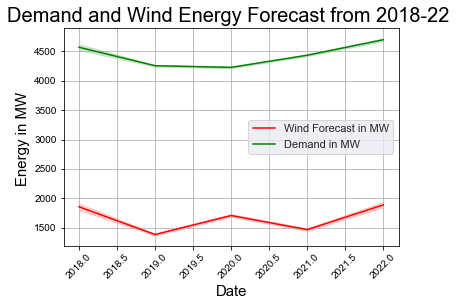

In [25]:
from matplotlib import style

fig = plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))
ax2=plt.subplot2grid((1,1),(0,0))
#ax = pd.concat([ax1,ax2], axis=0,keys=['ax1','ax2']).reset_index()
#ax=ax.rename(columns={'level_0':'group'})

style.use('ggplot')

sns.lineplot(x=df['year'], y=df['WF'], data=df, color='red',label='Wind Forecast in MW')
sns.lineplot(x=df['year'], y=df['DF'], data=df, color = 'green',label='Demand in MW')

sns.set(rc={'figure.figsize':(8,8)})


plt.xlabel('Date',color='black',fontsize=15)
plt.ylabel('Energy in MW ',color='black',fontsize=15)
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    
plt.title('Demand and Wind Energy Forecast from 2018-22 ',fontsize=20,color='black')
plt.savefig('png')

**Lowest energy consumption: 2019
Maximum energy consumption: 2018 and 2022(first 6 months)**

No handles with labels found to put in legend.


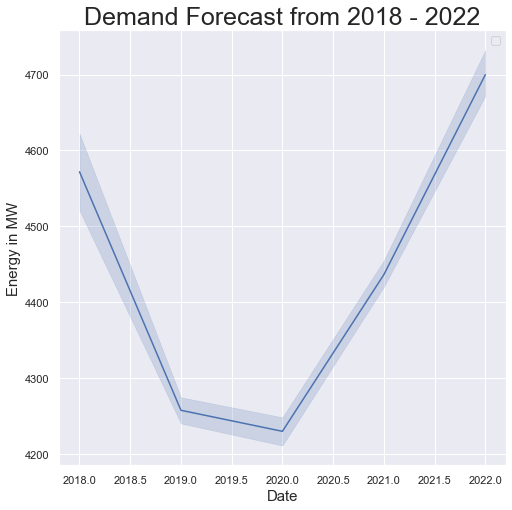

In [26]:
from matplotlib import style

fig = plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))
ax2=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=df['year'], y=df['DF'], data=df)
sns.set(rc={'figure.figsize':(8,8)})

plt.title('Demand Forecast from 2018 - 2022', fontsize=25)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Energy in MW',fontsize=15)
plt.grid(True, alpha=1)
plt.legend()


for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(0)
    
#plt.title('Energy Consumption according to the year:Demand Forecast')
plt.savefig('png')

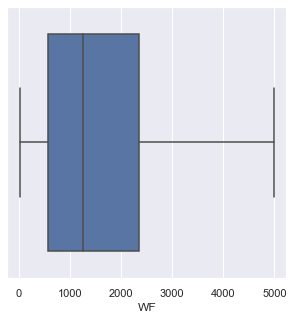

In [27]:
plt.figure(figsize=(5,5))
sns.boxplot(df['WF'])

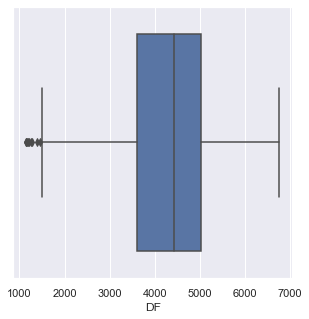

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(df['DF'])

**Not normal distribution**

In [29]:

from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


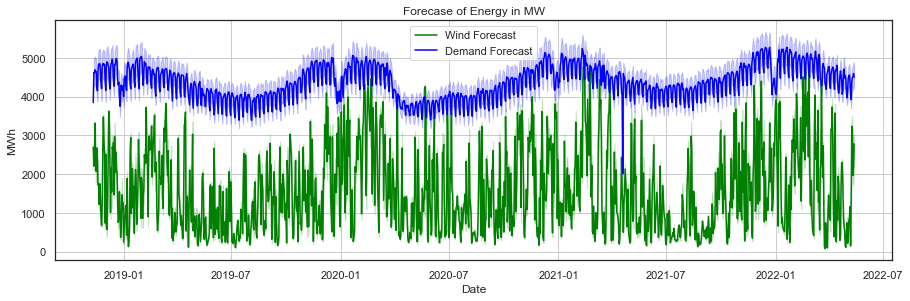

In [30]:
from matplotlib import style

sns.set(style='white')

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)

#ax=pd.concat([df['WF'],df['DF']], axis=0,keys=df['WF'],df['DF']).reset_index()

sns.lineplot(x=df['date'], y=df['WF'], data=df,label = 'Wind Forecast', color = 'green')
sns.lineplot(x=df['date'], y=df['DF'], data=df,label = 'Demand Forecast',color = 'blue')
plt.title('Forecase of Energy in MW')
plt.xlabel('Date')
plt.ylabel("MWh")
plt.grid(True,alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
plt.savefig('png')


In [31]:
wind_demand = df[['WF','DF','EURPrices']].corr()
wind_demand

,WF,DF,EURPrices
WF,1.000000,0.130775,-0.166879
DF,0.130775,1.000000,0.378288
EURPrices,-0.166879,0.378288,1.000000


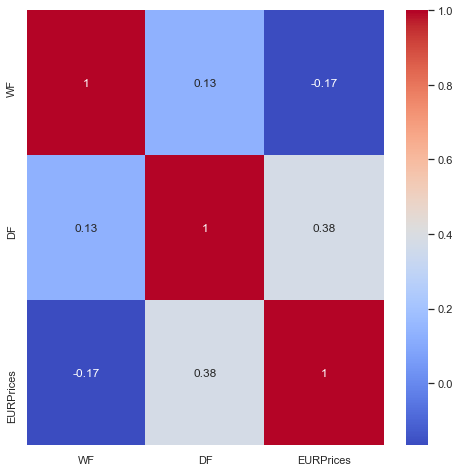

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(wind_demand,annot=True, fmt='.2g', cmap='coolwarm')

# Date and Price

No handles with labels found to put in legend.


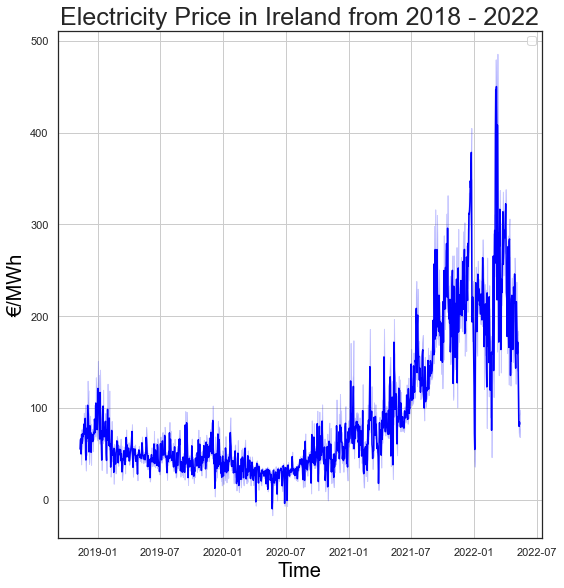

In [33]:
plt.figure(figsize=(8,8))
sns.lineplot(df['date'], df['EURPrices'], color = 'blue')

plt.xlabel('Time', fontsize=20,color='black')
plt.ylabel('€/MWh', fontsize=20,color='black')
plt.tight_layout()
plt.title('Electricity Price in Ireland from 2018 - 2022', fontsize=25)
plt.grid(alpha=1)
plt.legend()


In [34]:
df_time = df.groupby([df['delivery_date'].dt.hour, df['delivery_time'], df['day']]).EURPrices.mean().reset_index()
df_time

,delivery_date,delivery_time,day,EURPrices
0,0,00:00:00,Friday,76.258092
1,0,00:00:00,Monday,70.341787
2,0,00:00:00,Saturday,70.058500
3,0,00:00:00,Sunday,73.655326
4,0,00:00:00,Thursday,70.404223
...,...,...,...,...
163,0,23:00:00,Saturday,76.011016
164,0,23:00:00,Sunday,77.418231
165,0,23:00:00,Thursday,85.117647
166,0,23:00:00,Tuesday,78.340912


In [35]:
df.head()

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time,year,month,date,time,week,day
0,2018-11-11 23:00:00,55.089,2695.41,3845.0,2018-11-11,23:00:00,2018,11,2018-11-11,23:00:00,45,Sunday
1,2018-11-12 00:00:00,55.120,2704.95,3501.0,2018-12-11,00:00:00,2018,12,2018-11-12,00:00:00,50,Tuesday
2,2018-11-12 01:00:00,46.460,2694.56,3341.0,2018-12-11,01:00:00,2018,12,2018-11-12,01:00:00,50,Tuesday
3,2018-11-12 02:00:00,45.710,2697.30,3226.0,2018-12-11,02:00:00,2018,12,2018-11-12,02:00:00,50,Tuesday
4,2018-11-12 03:00:00,41.380,2649.02,3157.0,2018-12-11,03:00:00,2018,12,2018-11-12,03:00:00,50,Tuesday


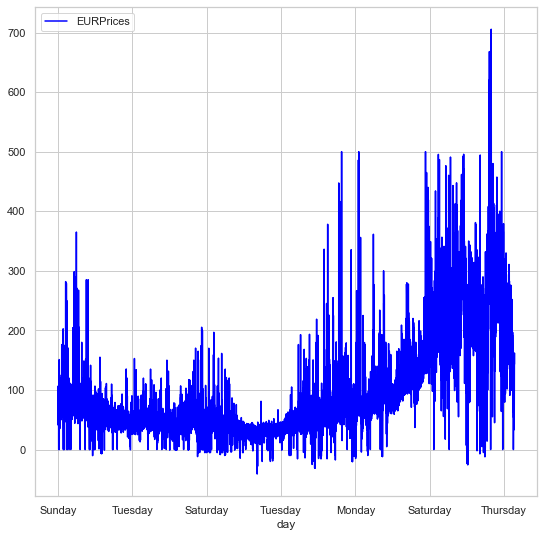

In [36]:
sns.set_style('whitegrid')

df.plot(x='day',y='EURPrices',figsize=(9,9),color='blue')

Text(0.5, 1.0, 'Pricing')

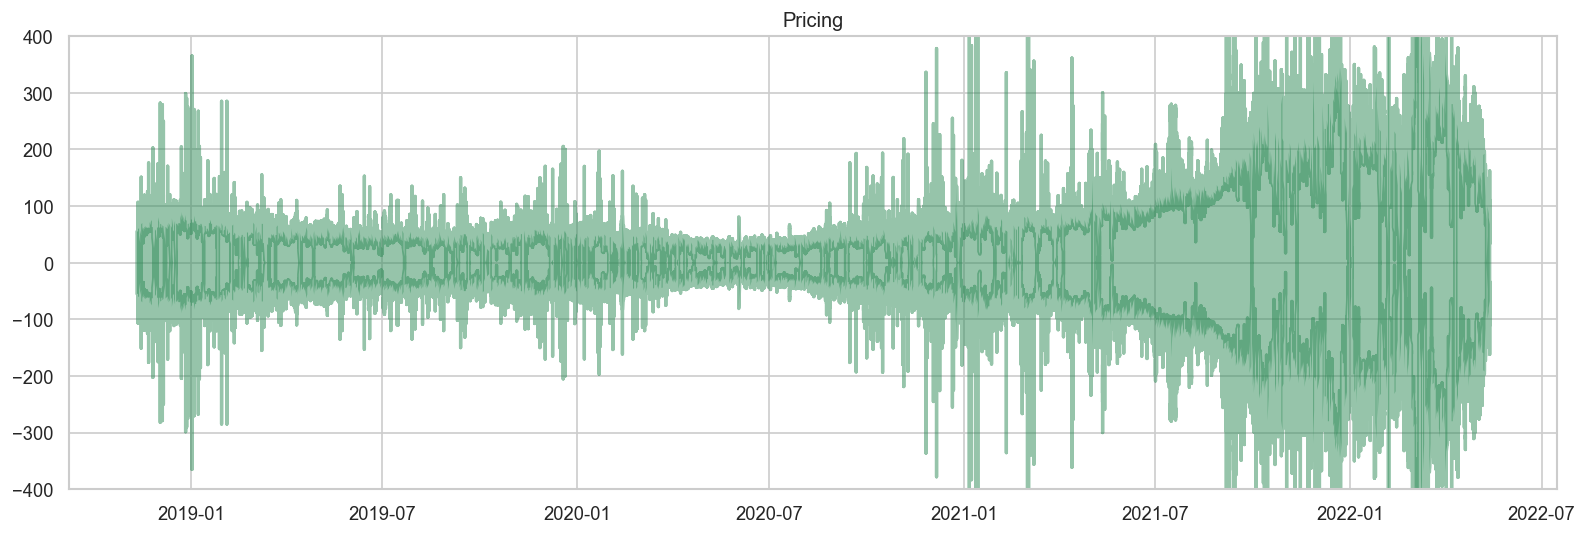

In [37]:
x=df['date'].values
y1=df['EURPrices'].values

#Plot
fig,ax = plt.subplots(1,1,figsize=(16,5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-400,400)
plt.title('Pricing')

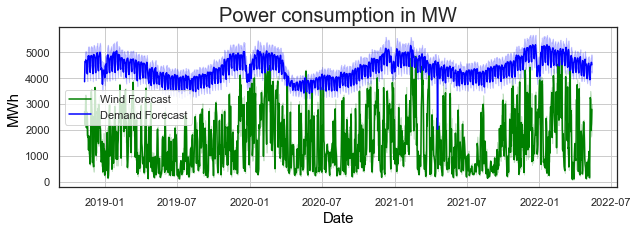

<Figure size 576x576 with 0 Axes>

In [38]:
from matplotlib import style

sns.set(style='white')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)

#ax=pd.concat([df['WF'],df['DF']], axis=0,keys=df['WF'],df['DF']).reset_index()

sns.lineplot(x=df['date'], y=df['WF'], data=df,label = 'Wind Forecast', color = 'green')
sns.lineplot(x=df['date'], y=df['DF'], data=df,label = 'Demand Forecast',color = 'blue')

plt.title('Power consumption in MW', fontsize=20)
plt.xlabel('Date', fontsize=15,color='black')
plt.ylabel("MWh", fontsize=15,color='black')
plt.grid(True,alpha=1)
plt.legend()
plt.show()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
plt.savefig('png')

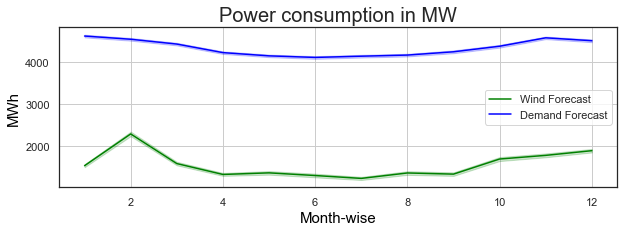

<Figure size 576x576 with 0 Axes>

In [39]:
from matplotlib import style

sns.set(style='white')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)

#ax=pd.concat([df['WF'],df['DF']], axis=0,keys=df['WF'],df['DF']).reset_index()

sns.lineplot(x=df['month'], y=df['WF'], data=df,label = 'Wind Forecast', color = 'green')
sns.lineplot(x=df['month'], y=df['DF'], data=df,label = 'Demand Forecast',color = 'blue')
plt.title('Power consumption in MW', fontsize=20)
plt.xlabel('Month-wise', fontsize=15,color='black')
plt.ylabel("MWh", fontsize=15,color='black')
plt.grid(True,alpha=1)
plt.legend()
plt.show()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)
    
plt.savefig('png')

# DEMAND FORECAST ANALYSIS

<Figure size 576x576 with 0 Axes>

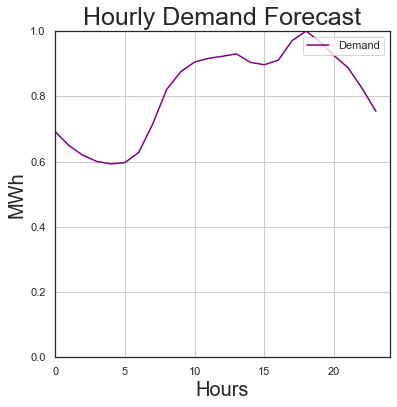

In [40]:
from sklearn import preprocessing

plt.figure(figsize=(8,8))
group_df=df.groupby('time')['DF'].mean()

norm_df=preprocessing.normalize(group_df.values.reshape(1,-1),norm='max')[0,:]
plt.figure(figsize=(6,6))
plt.plot(norm_df, label ='Demand',color='purple')
plt.xlim(0,24)
plt.ylim([0.0,1.0])
plt.xlabel("Hours",fontsize=20)
plt.ylabel("MWh",fontsize=20)
plt.title('Hourly Demand Forecast',fontsize=25)
plt.grid()
plt.legend(loc='upper right', fancybox=True)

plt.show()


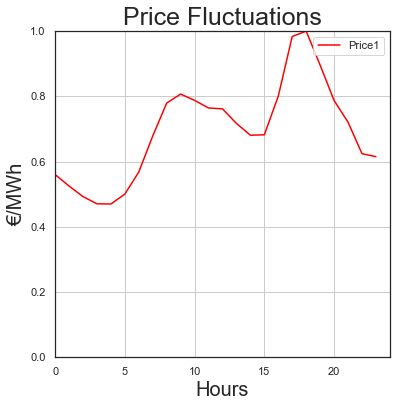

In [41]:




group_hr=df.groupby('time')['EURPrices'].mean()
norm_hr=preprocessing.normalize(group_hr.values.reshape(1,-1),norm='max')[0,:]
plt.figure(figsize=(6,6))
plt.plot(norm_hr, label ='Price1',color='red')
plt.xlim(0,24)
plt.ylim([0.0,1.0])
plt.xlabel("Hours",fontsize=20)
plt.ylabel("€/MWh",fontsize=20)
plt.title('Price Fluctuations',fontsize=25)
plt.grid()
plt.legend(loc='upper right', fancybox=True)

plt.show()

<Figure size 576x576 with 0 Axes>

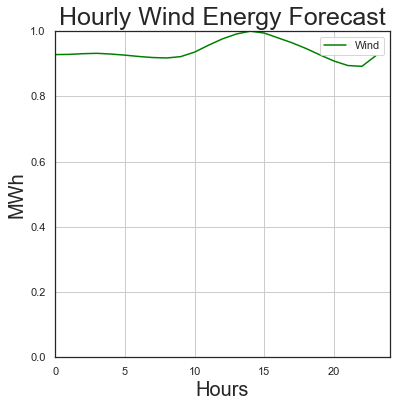

In [42]:
plt.figure(figsize=(8,8))
group_wf=df.groupby('time')['WF'].mean()

norm_wf=preprocessing.normalize(group_wf.values.reshape(1,-1),norm='max')[0,:]
plt.figure(figsize=(6,6))
plt.plot(norm_wf, label ='Wind',color='green')
plt.xlim(0,24)
plt.ylim([0.0,1.0])
plt.xlabel("Hours",fontsize=20)
plt.ylabel("MWh",fontsize=20)
plt.title('Hourly Wind Energy Forecast',fontsize=25)
plt.grid()
plt.legend(loc='upper right', fancybox=True)

plt.show()


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<Figure size 720x576 with 0 Axes>

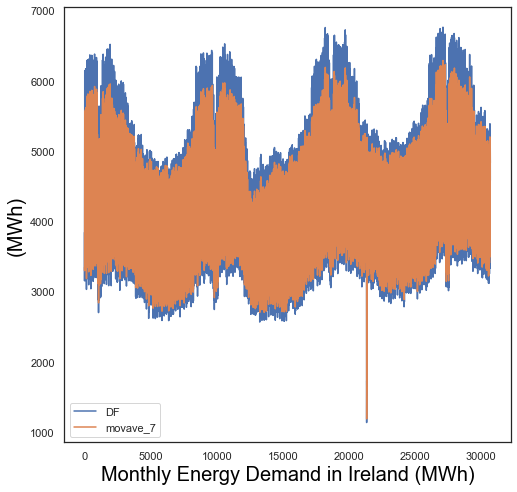

In [43]:
# Datetime for 1, 7, 30, 90 and 365 days
df1 = df[['delivery_date','DF']]

#

df1[["movave_1", "movstd_1"]] = df1['DF'].rolling(1).agg([np.mean, np.std])
df1[["movave_7", "movstd_7"]] = df1['DF'].rolling(7).agg([np.mean, np.std])
df1[["movave_30", "movstd_30"]] = df1['DF'].rolling(30).agg([np.mean, np.std])
df1[["movave_90", "movstd_90"]] = df1['DF'].rolling(90).agg([np.mean, np.std])
df1[["movave_365", "movstd_365"]] = df1['DF'].rolling(365).agg([np.mean, np.std])

plt.figure(figsize=(10,8))


#print(df1)

df1[["DF", "movave_7"]].plot(figsize=(8,8))
plt.xlabel("Monthly Energy Demand in Ireland (MWh)",fontsize=20,color='black')
plt.ylabel("(MWh)", fontsize=20,color='black')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<Figure size 720x576 with 0 Axes>

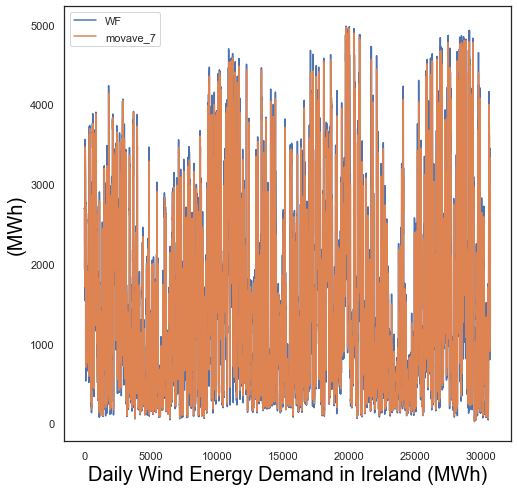

In [44]:
df2 = df[['delivery_date','WF']]
df2[["movave_1", "movstd_1"]] = df2['WF'].rolling(1).agg([np.mean, np.std])
df2[["movave_7", "movstd_7"]] = df2['WF'].rolling(7).agg([np.mean, np.std])
df2[["movave_30", "movstd_30"]] = df2['WF'].rolling(30).agg([np.mean, np.std])
df2[["movave_90", "movstd_90"]] = df2['WF'].rolling(90).agg([np.mean, np.std])
df2[["movave_365", "movstd_365"]] = df2['WF'].rolling(365).agg([np.mean, np.std])

plt.figure(figsize=(10,8))



df2[["WF", "movave_7"]].plot(figsize=(8,8))
plt.xlabel("Daily Wind Energy Demand in Ireland (MWh)",fontsize=20,color='black')
plt.ylabel("(MWh)", fontsize=20,color='black')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<Figure size 720x576 with 0 Axes>

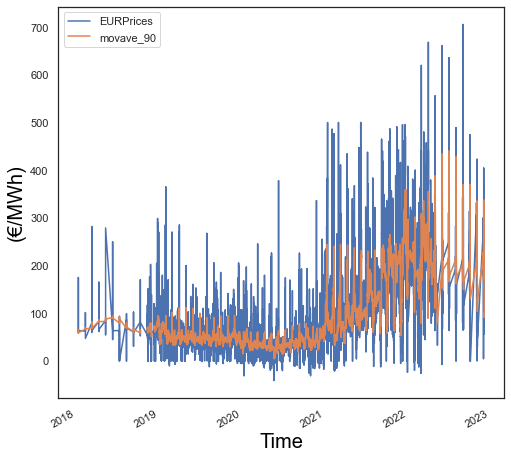

In [45]:
df3 = df[['delivery_date','EURPrices']]
df3[["movave_1", "movstd_1"]] = df3['EURPrices'].rolling(1).agg([np.mean, np.std])
df3[["movave_7", "movstd_7"]] = df3['EURPrices'].rolling(7).agg([np.mean, np.std])
df3[["movave_30", "movstd_30"]] = df3['EURPrices'].rolling(30).agg([np.mean, np.std])
df3[["movave_90", "movstd_90"]] = df3['EURPrices'].rolling(90).agg([np.mean, np.std])
df3[["movave_365", "movstd_365"]] = df3['EURPrices'].rolling(365).agg([np.mean, np.std])

plt.figure(figsize=(10,8))



df3.plot.line(x='delivery_date',y=["EURPrices", "movave_90"])
plt.xlabel("Time",fontsize=20,color='black')
plt.ylabel("(€/MWh)", fontsize=20,color='black')
plt.show()

Text(0, 0.5, 'MWh')

<Figure size 576x576 with 0 Axes>

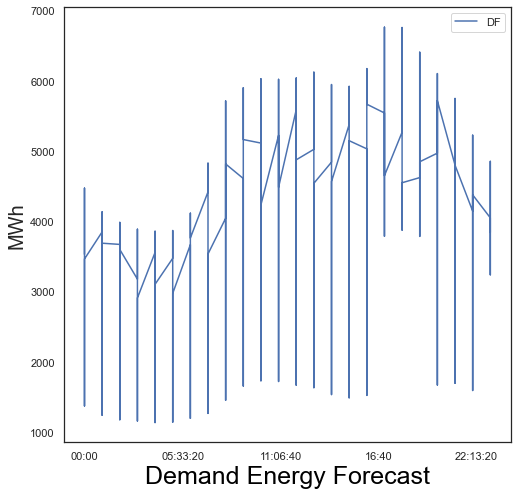

In [46]:
plt.figure(figsize=(8,8))
df.plot(x='time',y='DF')

plt.xlabel('Demand Energy Forecast', fontsize=25,color='black')
plt.ylabel('MWh', fontsize=20)

In [47]:
#df=df.drop([df.index.min(),df.index.max()])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DeliveryPeriod  30696 non-null  datetime64[ns]
 1   EURPrices       30696 non-null  float64       
 2   WF              30696 non-null  float64       
 3   DF              30696 non-null  float64       
 4   delivery_date   30696 non-null  datetime64[ns]
 5   delivery_time   30696 non-null  object        
 6   year            30696 non-null  int64         
 7   month           30696 non-null  int64         
 8   date            30696 non-null  object        
 9   time            30696 non-null  object        
 10  week            30696 non-null  int64         
 11  day             30696 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 2.8+ MB


Text(0, 0.5, 'MWh')

<Figure size 576x576 with 0 Axes>

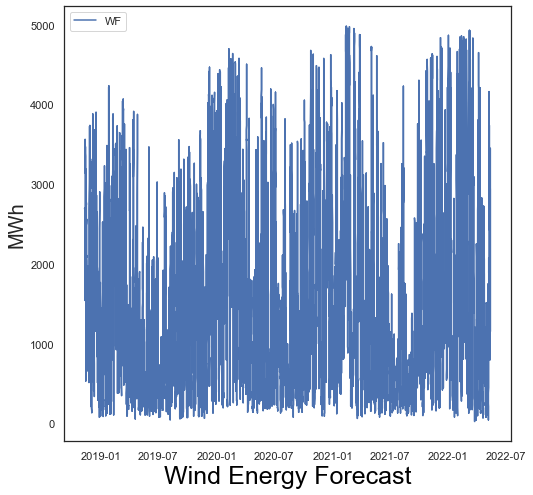

In [48]:
plt.figure(figsize=(8,8))
df.plot(x='date',y='WF')

plt.xlabel('Wind Energy Forecast', fontsize=25,color='black')
plt.ylabel('MWh', fontsize=20)

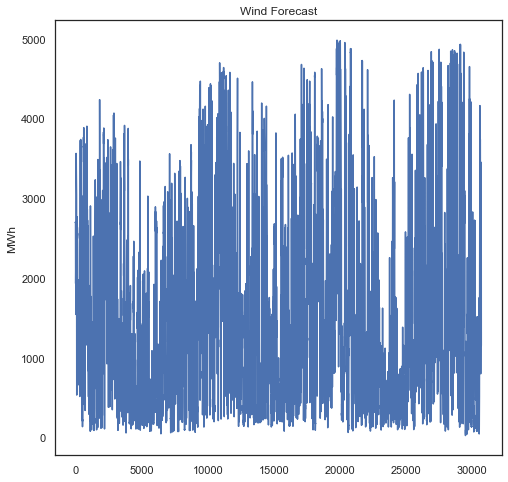

In [49]:
df['WF'].plot(title='Wind Forecast',figsize=(8,8))
plt.ylabel('MWh')
plt.show()

EDA: Exploratory Data Analysis

Target Analysis

Seasonality and Trend


The goal is to graphically characterize time series data, withouth relying on any (almost) any statistical method like decomposing.


Target Analyisis: Normality

In [50]:
from  scipy.stats import skew, kurtosis, shapiro

mean = np.mean(df['DF'].values)
std = np.std(df['DF'].values)
skew = skew(df['DF'].values)
ex_kurt = kurtosis(df['DF'])
print("Skewness of Demand Forecast: {} \nKurtosis of Demand Forecast: {}".format(skew, ex_kurt+3))

Skewness of Demand Forecast: 0.02927731073042516 
Kurtosis of Demand Forecast: 2.1961735010615517


# Positive skewness: Data distribution is not symmetric and has a very small right tail
# Kurtosis below 3 : It means that the tail is slighlty thinner than in a Normal Distribution . It is said that the distribution is platykurtic and the chance of finding extreme values is lower than in a Normal Distribution

In [51]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(df['DF'], alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 0.0 is lower than significance level: 0.05, therefore null hypothesis is rejected


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [52]:
from  scipy.stats import skew, kurtosis, shapiro

mean = np.mean(df['WF'].values)
std = np.std(df['WF'].values)
skew = skew(df['WF'].values)
ex_kurt = kurtosis(df['WF'])
print("Skewness of Wind Forecast: {} \nKurtosis of Wind Forecast: {}".format(skew, ex_kurt+3))

Skewness of Wind Forecast: 0.7944650612501762 
Kurtosis of Wind Forecast: 2.678246651769182


In [53]:
from  scipy.stats import skew, kurtosis, shapiro
mean = np.mean(df['EURPrices'].values)
std = np.std(df['EURPrices'].values)
skew = skew(df['EURPrices'].values)
ex_kurt = kurtosis(df['EURPrices'])
print("Skewness of Price: {} \nKurtosis of Price: {}".format(skew, ex_kurt+3))

Skewness of Price: 1.8043754871399367 
Kurtosis of Price: 6.690651817833583


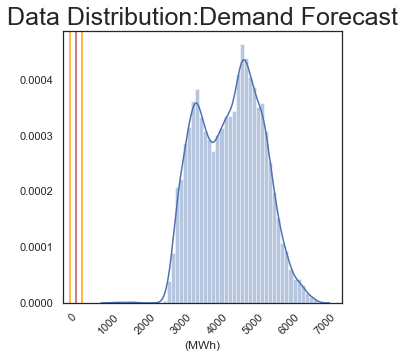

In [54]:
plt.figure(figsize=(5,5))
sns.distplot(df['DF'])
plt.title("Data Distribution:Demand Forecast", fontsize=25)
plt.xticks(rotation=45)
plt.xlabel("(MWh)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

In [55]:
df['DF'].describe()

count    30696.000000
mean      4358.764725
std        869.231465
min       1142.000000
25%       3607.000000
50%       4415.000000
75%       5021.000000
max       6764.000000
Name: DF, dtype: float64

**VOLATILITY ANALYSIS**

In [56]:
df1 = df[['date','DF']]
print(df1)


             date      DF
0      2018-11-11  3845.0
1      2018-11-12  3501.0
2      2018-11-12  3341.0
3      2018-11-12  3226.0
4      2018-11-12  3157.0
...           ...     ...
30691  2022-05-13  5037.0
30692  2022-05-13  4878.0
30693  2022-05-13  4783.0
30694  2022-05-13  4675.0
30695  2022-05-13  4588.0

[30696 rows x 2 columns]


<ipython-input-57-366fa1224be6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['q10'] = data_rolling.quantile(0.1).to_frame("q10")
<ipython-input-57-366fa1224be6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['q50'] = data_rolling.quantile(0.5).to_frame("q50")
<ipython-input-57-366fa1224be6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

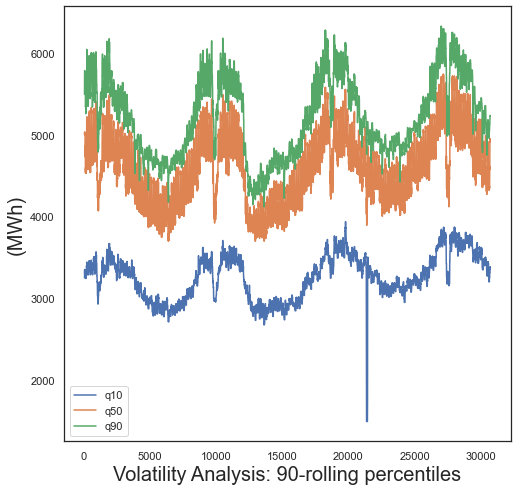

In [57]:
data_rolling = df1['DF'].rolling(window=90)
                 
df1['q10'] = data_rolling.quantile(0.1).to_frame("q10")
df1['q50'] = data_rolling.quantile(0.5).to_frame("q50")
df1['q90'] = data_rolling.quantile(0.9).to_frame("q90")

df1[["q10", "q50", "q90"]].plot(figsize=(8,8))

plt.xlabel("Volatility Analysis: 90-rolling percentiles",fontsize=20)
plt.ylabel("(MWh)",fontsize=20)
plt.show()

# Wind Forecast

Text(0, 0.5, 'MWh')

<Figure size 576x576 with 0 Axes>

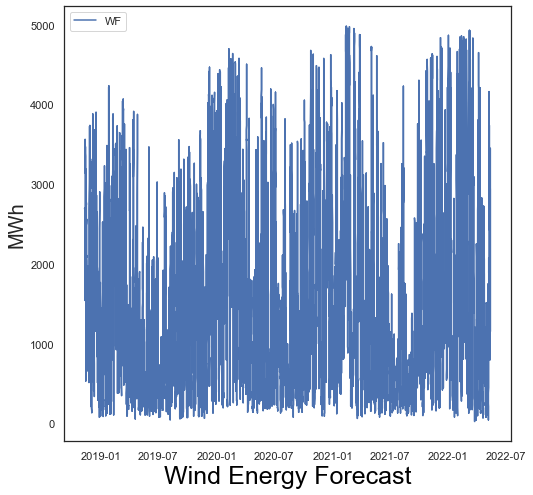

In [58]:
plt.figure(figsize=(8,8))
df.plot(x='date',y='WF')

plt.xlabel('Wind Energy Forecast', fontsize=25,color='black')
plt.ylabel('MWh', fontsize=20)

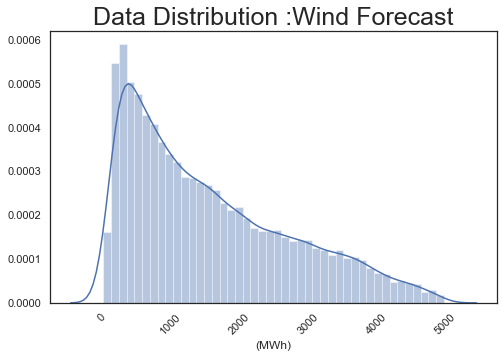

In [59]:
plt.figure(figsize=(8,5))
sns.distplot(df['WF'])
plt.title("Data Distribution :Wind Forecast", fontsize=25)
plt.xticks(rotation=45)
plt.xlabel("(MWh)")
#plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
#plt.axvline(x=mean+2*std, color='orange', linestyle='-')
#plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

In [60]:
df['WF'].describe()

count    30696.000000
mean      1570.708566
std       1185.276084
min         24.905000
25%        573.556750
50%       1265.832500
75%       2353.090000
max       4984.441000
Name: WF, dtype: float64

In [61]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(df['WF'], alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 0.0 is lower than significance level: 0.05, therefore null hypothesis is rejected


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
df.head(2)

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time,year,month,date,time,week,day
0,2018-11-11 23:00:00,55.089,2695.41,3845.0,2018-11-11,23:00:00,2018,11,2018-11-11,23:00:00,45,Sunday
1,2018-11-12 00:00:00,55.120,2704.95,3501.0,2018-12-11,00:00:00,2018,12,2018-11-12,00:00:00,50,Tuesday


In [63]:
df.describe()

,EURPrices,WF,DF,year,month,week
count,30696.000000,30696.000000,30696.000000,30696.000000,30696.000000,30696.000000
mean,89.141545,1570.708566,4358.764725,2020.129659,6.441947,26.279971
std,80.889330,1185.276084,869.231465,1.061276,3.548911,15.498033
min,-41.090000,24.905000,1142.000000,2018.000000,1.000000,1.000000
25%,38.317750,573.556750,3607.000000,2019.000000,3.000000,13.000000
50%,57.695000,1265.832500,4415.000000,2020.000000,6.000000,26.000000
75%,110.422500,2353.090000,5021.000000,2021.000000,10.000000,40.000000
max,705.470000,4984.441000,6764.000000,2022.000000,12.000000,53.000000


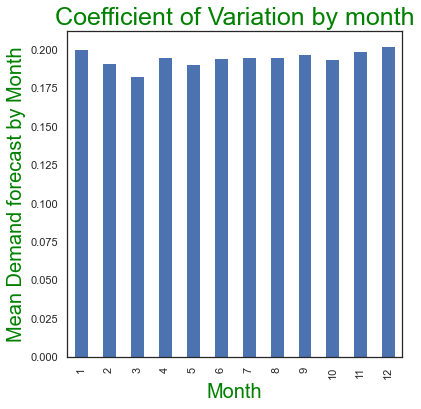

In [64]:
df.groupby('month')['DF'].std().divide(df.groupby("month")['DF'].mean()).plot(kind='bar',figsize=(6,6))

plt.title('Coefficient of Variation by month', fontsize=25,color='green')
plt.xlabel('Month',fontsize=20, color='green')
plt.ylabel('Mean Demand forecast by Month', fontsize=20,color='green')
plt.show()

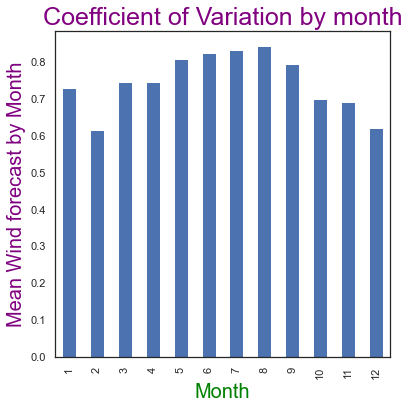

In [65]:
df.groupby('month')['WF'].std().divide(df.groupby("month")['WF'].mean()).plot(kind='bar', figsize=(6,6))
plt.title('Coefficient of Variation by month', fontsize=25,color='purple')
plt.xlabel('Month',fontsize=20,color='green')
plt.ylabel('Mean Wind forecast by Month', fontsize=20,color='purple')
plt.show()

**In the short term (quaterly and monthly) volatility is changeable, and so in the long term ('year' window) it is a little more stable during the peaks, therefore, candidate predictors will have to deal with seasonal pattern in variance.**

**Time Series Analysis:
Seasonality and Trend**

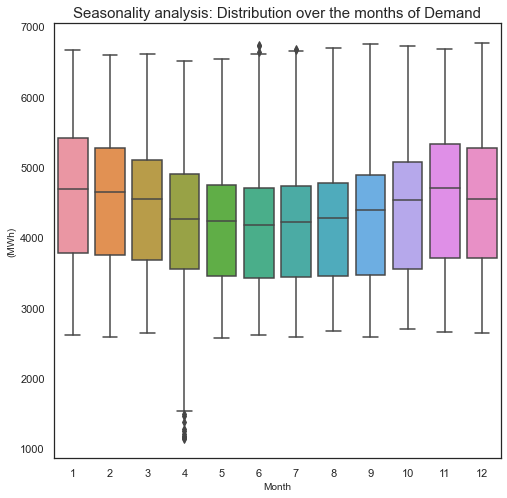

In [66]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x="month", y="DF")
plt.title("Seasonality analysis: Distribution over the months of Demand", fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel("(MWh)", fontsize=10)
plt.show()

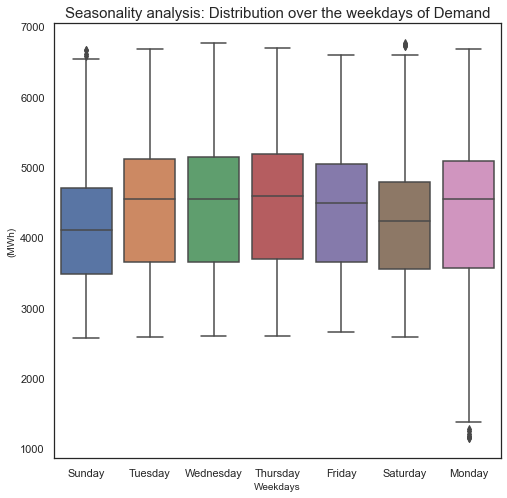

In [67]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x="day", y="DF")
plt.title("Seasonality analysis: Distribution over the weekdays of Demand", fontsize=15)
plt.xlabel('Weekdays', fontsize=10)
plt.ylabel("(MWh)", fontsize=10)
plt.show()

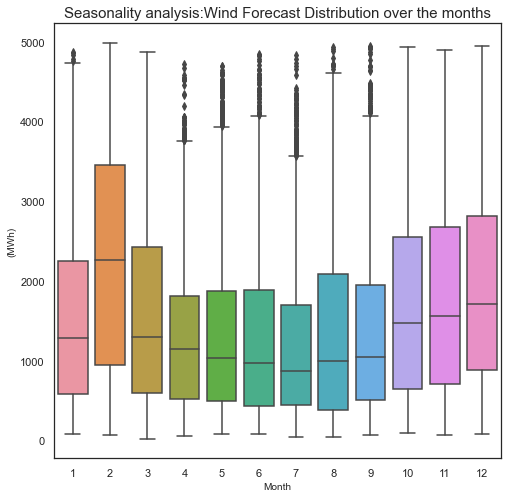

In [68]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x="month", y="WF")
plt.title("Seasonality analysis:Wind Forecast Distribution over the months", fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel("(MWh)", fontsize=10)
plt.show()

**Two seasonal patterns**

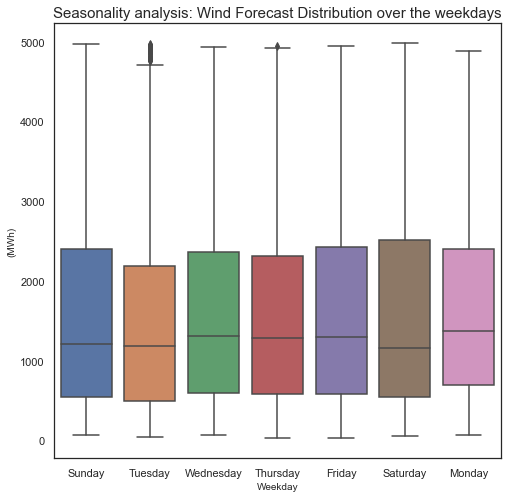

In [69]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x="day", y="WF")
plt.title("Seasonality analysis: Wind Forecast Distribution over the weekdays", fontsize=15)
plt.xlabel('Weekday', fontsize=10)
plt.ylabel("(MWh)", fontsize=10)
plt.show()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DeliveryPeriod  30696 non-null  datetime64[ns]
 1   EURPrices       30696 non-null  float64       
 2   WF              30696 non-null  float64       
 3   DF              30696 non-null  float64       
 4   delivery_date   30696 non-null  datetime64[ns]
 5   delivery_time   30696 non-null  object        
 6   year            30696 non-null  int64         
 7   month           30696 non-null  int64         
 8   date            30696 non-null  object        
 9   time            30696 non-null  object        
 10  week            30696 non-null  int64         
 11  day             30696 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 2.8+ MB


In [71]:
df.head()

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time,year,month,date,time,week,day
0,2018-11-11 23:00:00,55.089,2695.41,3845.0,2018-11-11,23:00:00,2018,11,2018-11-11,23:00:00,45,Sunday
1,2018-11-12 00:00:00,55.120,2704.95,3501.0,2018-12-11,00:00:00,2018,12,2018-11-12,00:00:00,50,Tuesday
2,2018-11-12 01:00:00,46.460,2694.56,3341.0,2018-12-11,01:00:00,2018,12,2018-11-12,01:00:00,50,Tuesday
3,2018-11-12 02:00:00,45.710,2697.30,3226.0,2018-12-11,02:00:00,2018,12,2018-11-12,02:00:00,50,Tuesday
4,2018-11-12 03:00:00,41.380,2649.02,3157.0,2018-12-11,03:00:00,2018,12,2018-11-12,03:00:00,50,Tuesday


In [72]:
df_copy = df.copy(deep=True) # Make a deep copy, including a copy of the data and the indices

df_copy.set_index('date',inplace=True)

df_copy.index = pd.to_datetime(df_copy.index)
df_copy.head(5)

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time,year,month,time,week,day
date,,,,,,,,,,,
2018-11-11,2018-11-11 23:00:00,55.089,2695.41,3845.0,2018-11-11,23:00:00,2018,11,23:00:00,45,Sunday
2018-11-12,2018-11-12 00:00:00,55.120,2704.95,3501.0,2018-12-11,00:00:00,2018,12,00:00:00,50,Tuesday
2018-11-12,2018-11-12 01:00:00,46.460,2694.56,3341.0,2018-12-11,01:00:00,2018,12,01:00:00,50,Tuesday
2018-11-12,2018-11-12 02:00:00,45.710,2697.30,3226.0,2018-12-11,02:00:00,2018,12,02:00:00,50,Tuesday
2018-11-12,2018-11-12 03:00:00,41.380,2649.02,3157.0,2018-12-11,03:00:00,2018,12,03:00:00,50,Tuesday


<ipython-input-73-511aebd8116a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['q10'] = data_rolling.quantile(0.1).to_frame("q10")
<ipython-input-73-511aebd8116a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['q50'] = data_rolling.quantile(0.5).to_frame("median") # it is also the median in the data
<ipython-input-73-511aebd8116a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

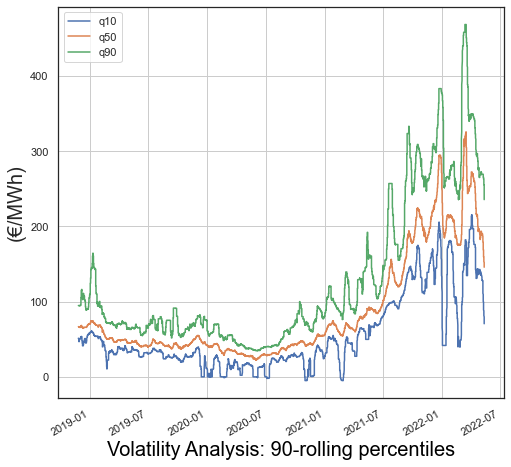

In [73]:
df2 = df_copy[['EURPrices']]
#print(df2)

data_rolling = df2['EURPrices'].rolling(window=360)

df2['q10'] = data_rolling.quantile(0.1).to_frame("q10")
df2['q50'] = data_rolling.quantile(0.5).to_frame("median") # it is also the median in the data
df2['q90'] = data_rolling.quantile(0.9).to_frame("q90")

df2[["q10",'q50','q90']].plot(figsize=(8,8))

plt.xlabel("Volatility Analysis: 90-rolling percentiles",fontsize=20, color='black')
plt.ylabel("(€/MWh)",fontsize=20)
plt.grid()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B1B72D0A0>,
      dtype=object)

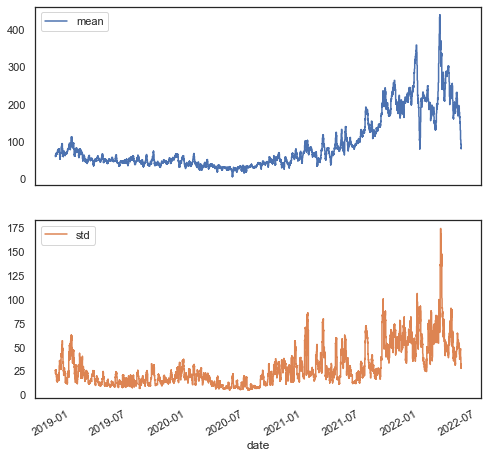

In [74]:
#Quarterly windows to analyse the price 
r = df2.EURPrices.rolling(90).agg(['mean','std'])
r.plot(subplots = True)

In [75]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30696 entries, 2018-11-11 to 2022-05-13
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DeliveryPeriod  30696 non-null  datetime64[ns]
 1   EURPrices       30696 non-null  float64       
 2   WF              30696 non-null  float64       
 3   DF              30696 non-null  float64       
 4   delivery_date   30696 non-null  datetime64[ns]
 5   delivery_time   30696 non-null  object        
 6   year            30696 non-null  int64         
 7   month           30696 non-null  int64         
 8   time            30696 non-null  object        
 9   week            30696 non-null  int64         
 10  day             30696 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(3)
memory usage: 2.8+ MB


In [76]:
df_daily = df_copy.resample(rule="D").sum()
df_daily=df_daily.asfreq('D')
df_daily.head()

,EURPrices,WF,DF,year,month,week
date,,,,,,
2018-11-11,55.089,2695.41,3845.0,2018,11,45
2018-11-12,1561.887,52938.19,110831.0,48432,288,1200
2018-11-13,1587.169,60593.12,110768.0,48432,264,1104
2018-11-14,1192.787,79620.48,112525.0,48432,264,1104
2018-11-15,1546.208,52690.38,111519.0,48432,264,1104


In [77]:
df_day_wf=df_daily[['WF']]
df_day_wf.head(2)

,WF
date,
2018-11-11,2695.41
2018-11-12,52938.19


<Figure size 720x720 with 0 Axes>

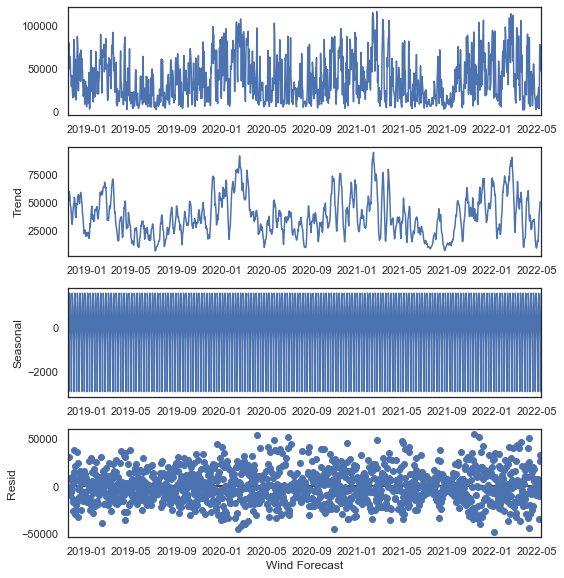

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_day_wf, model='additive')

plt.figure(figsize=(10,10))
fig = decomposition.plot()
plt.xlabel('Wind Forecast')

plt.show()

In [79]:
df_day_df=df_daily[['DF']]
df_day_df.head(2)

,DF
date,
2018-11-11,3845.0
2018-11-12,110831.0


<Figure size 720x720 with 0 Axes>

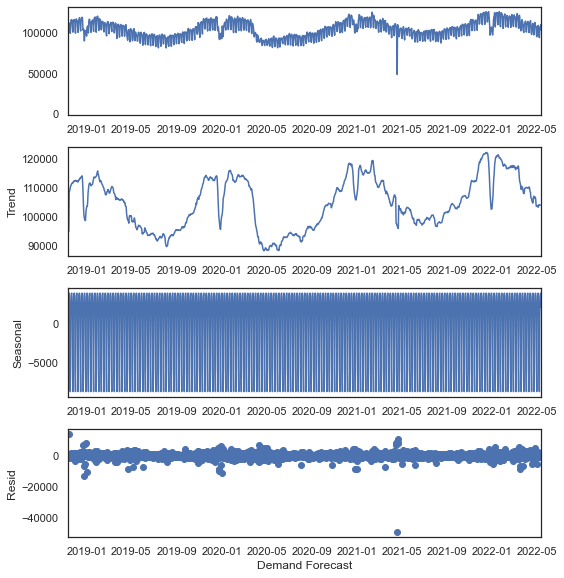

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_day_df, model='additive')

plt.figure(figsize=(10,10))
fig = decomposition.plot()
plt.xlabel('Demand Forecast')

plt.show()


In [81]:
df_day_price=df_daily[['EURPrices']]
df_day_price.head(2)

,EURPrices
date,
2018-11-11,55.089
2018-11-12,1561.887


<Figure size 576x576 with 0 Axes>

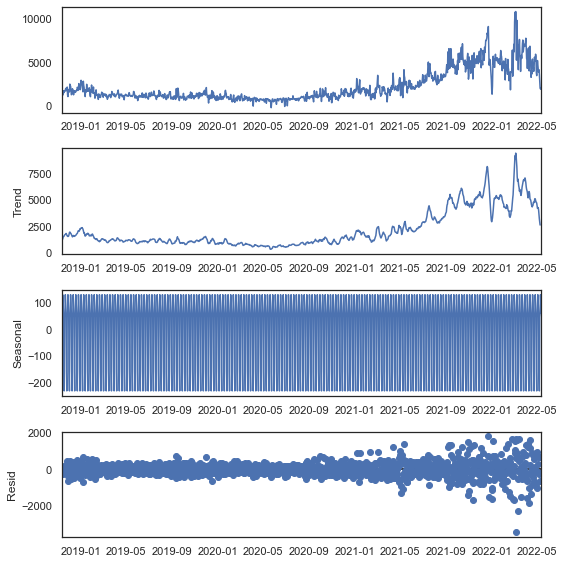

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_day_price, model='additive')

plt.figure(figsize=(8,8))
fig = decomposition.plot()
plt.show()

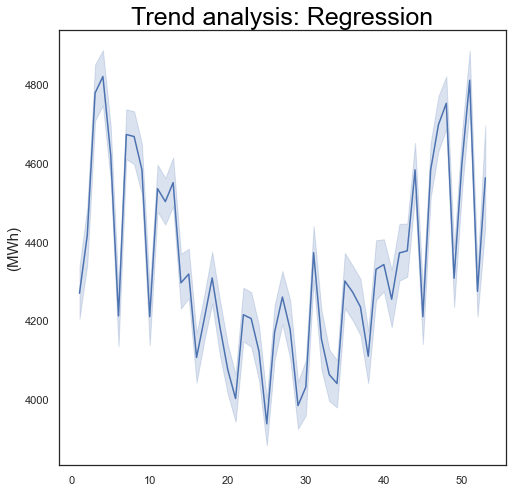

In [83]:
sns.lineplot(x="week", y="DF",data=df)
plt.title("Trend analysis: Regression", fontsize=25,color='black')
plt.ylabel("(MWh)", fontsize=15)
plt.xlabel("")
plt.show()

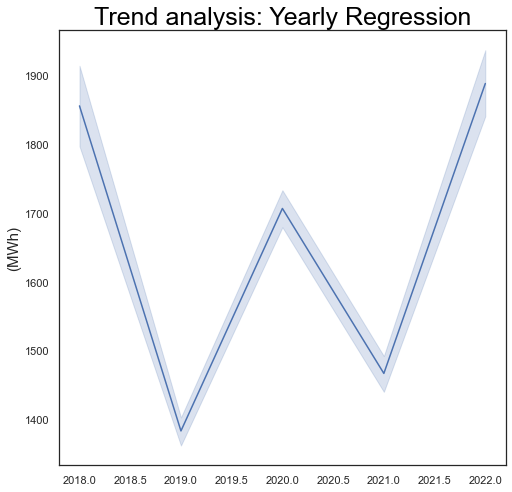

In [84]:
sns.lineplot(x="year", y="WF",data=df)
plt.title("Trend analysis: Yearly Regression", fontsize=25,color='black')
plt.ylabel("(MWh)", fontsize=15)
plt.xlabel("")
plt.show()

In [85]:
from statsmodels.tsa import stattools

acf_eur = stattools.acf(df['EURPrices'], unbiased=True, nlags=100)
acf_DF = stattools.acf(df['DF'], unbiased=True, nlags=100)
acf_WF = stattools.acf(df['WF'], unbiased=True, nlags=100)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


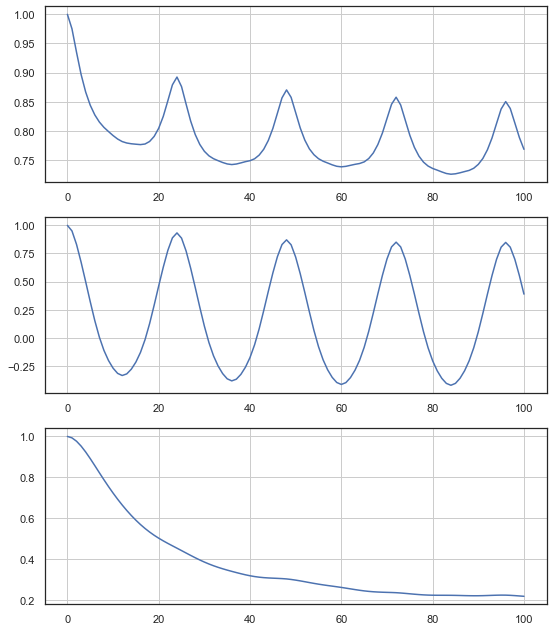

In [86]:
plt.figure(figsize = (9,11))

plt.subplot(3, 1, 1)
pd.Series(acf_eur).plot()
plt.grid()

plt.subplot(3, 1, 2)
pd.Series(acf_DF).plot()
plt.grid()

plt.subplot(3, 1, 3)
pd.Series(acf_WF).plot()
plt.grid()


**On x axis we have the lag and on y axis we have the correlation value.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


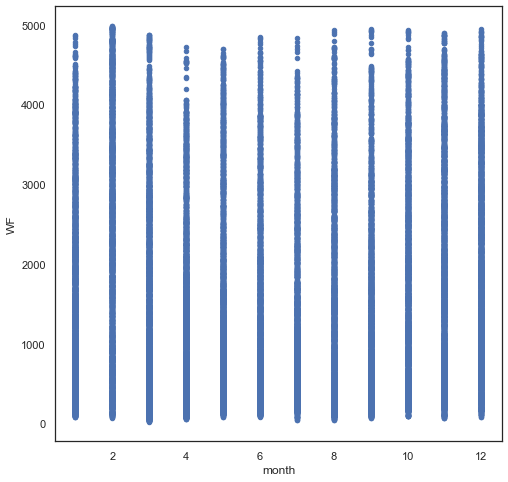

In [87]:
df.plot.scatter(x='month',y='WF')

In [88]:
df.head(2)

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time,year,month,date,time,week,day
0,2018-11-11 23:00:00,55.089,2695.41,3845.0,2018-11-11,23:00:00,2018,11,2018-11-11,23:00:00,45,Sunday
1,2018-11-12 00:00:00,55.120,2704.95,3501.0,2018-12-11,00:00:00,2018,12,2018-11-12,00:00:00,50,Tuesday


In [89]:
df_copy.head(2)

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time,year,month,time,week,day
date,,,,,,,,,,,
2018-11-11,2018-11-11 23:00:00,55.089,2695.41,3845.0,2018-11-11,23:00:00,2018,11,23:00:00,45,Sunday
2018-11-12,2018-11-12 00:00:00,55.120,2704.95,3501.0,2018-12-11,00:00:00,2018,12,00:00:00,50,Tuesday


# Train-test split 

**Lets split at 1 year prior i.e. at 13.05-2021**

**LSTM RNN model**

**When modeling a time series by LSTM RNN, it is crucial to to properly shape the input data in a sliding windows format.**

**First, we need to specify the prediciton window. In this application, the data is given as monthly data. So, for example, we can use a 12 steps prediction window. This means that we use 12 samples of data (data of an entire year) to predict the 13th sample.**


In [90]:
# First we split it up between train and test
# We will aim for a 12 month forecast horizon (ie predict the last 12 months in the dataset)
#cutoff = '2021-05-12'

#df_daily.sort_index()

#train = df_daily[:cutoff]
#test = df_daily[cutoff:]


**Now we can split the data into a train and test set. In particular, this means that the train set will have samples from year 2018-2021, while the test set will have values from last 12 months.**

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [92]:
train, test = train_test_split(df,test_size=0.2,random_state=0)
test_df = pd.DataFrame(test)
train_df = pd.DataFrame(train)

In [93]:
train.shape

(24556, 12)

In [94]:
train.head(2)

,DeliveryPeriod,EURPrices,WF,DF,delivery_date,delivery_time,year,month,date,time,week,day
2297,2019-02-15 16:00:00,56.371,2265.68,5027.0,2019-02-15,16:00:00,2019,2,2019-02-15,16:00:00,7,Friday
27499,2021-12-31 18:00:00,230.000,2348.13,5525.0,2021-12-31,18:00:00,2021,12,2021-12-31,18:00:00,52,Friday


In [95]:
test.shape

(6140, 12)

In [96]:
train_price = train[['EURPrices']]
train_wf = train[['WF']]
train_df = train[['DF']]

In [97]:
test_price = test[['EURPrices']]
test_wf = test[['WF']]
test_df = test[['DF']]

In [98]:
Price=df['EURPrices']
from statsmodels.tsa.stattools import adfuller
result = adfuller(Price)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.712759
p-value: 0.000080
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [99]:
DF=df['DF']
from statsmodels.tsa.stattools import adfuller
result = adfuller(DF)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.536936
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [100]:
WF=df['WF']
from statsmodels.tsa.stattools import adfuller
result = adfuller(WF)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.185570
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# ARIMA MODEL

In [101]:

from statsmodels.tsa.arima_model import ARIMA
(p, d, q) = (6, 0, 6)
model = ARIMA(train_wf, order=(p,d,q)) 

model = model.fit(disp=0)
print(model.summary())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
(p, d, q) = (6, 0, 6)
model = ARIMA(train_df, order=(p,d,q)) 

model = model.fit(disp=0)
print(model.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
(p, d, q) = (6, 0, 6)
model = ARIMA(train_price, order=(p,d,q)) 

model = model.fit(disp=0)
print(model.summary())

# FORECAST WITH ARIMA MODEL 

**Lets consider last 1 years's data and split it into train test data for forecasting**

In [ ]:
#cutoff = '2021-05-12'


train, test = train_test_split(df,test_size=0.2,random_state=0)
#train = df_daily[:cutoff]
#test = df_daily[cutoff:]


In [ ]:
forecast = model.forecast(steps=6140)[0] 

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_wf, forecast)
print('Test MSE: %.3f' % error)

In [ ]:
plt.plot(forecast,c='r', label='Forecast')
plt.plot(test_wf,c = 'g', label='Actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
s = 'MSE:' + str(error) + '% ' + ' - ARIMA('+str(p)+','+str(d)+','+str(q)+')'
plt.text(5,0.9,s)
plt.show()

In [ ]:
df_wf=df[['DeliveryPeriod','WF']]
df_df=df[['DeliveryPeriod','DF']]
df_price=df[['DeliveryPeriod','EURPrices']]


In [ ]:
arr_wf = np.array(df_wf)
df_wf.head(2)